In [1]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [3]:
df = pd.read_csv(r"C:\Users\user\OneDrive\HR_comma_sep 1.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [7]:
#Group data by whether employee left or stayed 
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Interpretation: Employees who left had significantly lower satisfaction levels and slightly higher working hours.
This shows that satisfaction level is the strongest predictor of employee retention.

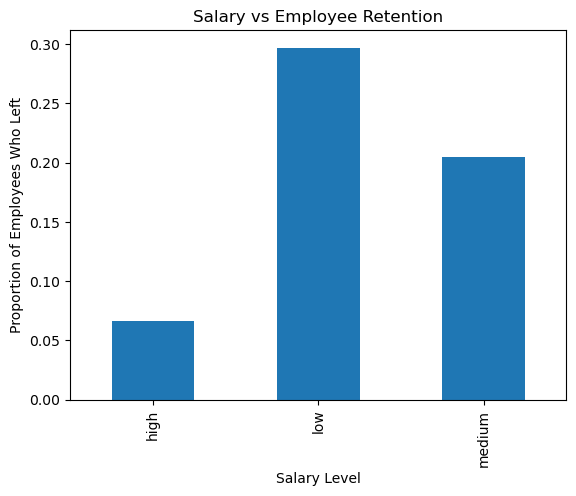

In [8]:
#Group employees by salary level using bar chart
salary_retention = df.groupby("salary")["left"].mean()

salary_retention.plot(kind="bar")
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

Interpretation:
Employees with low salaries have the highest turnover rate.
Higher salary levels are associated with better retention.

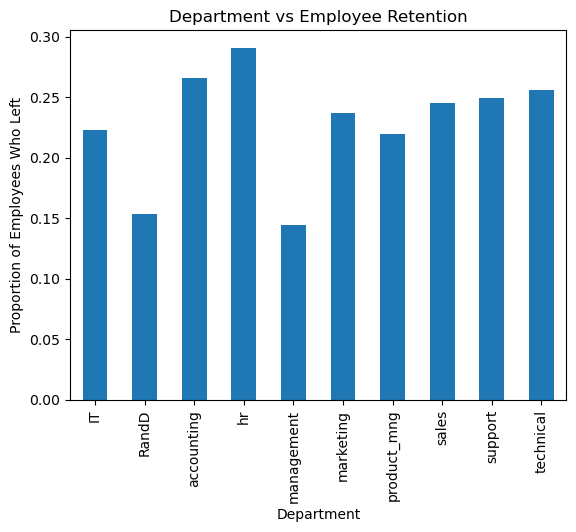

In [9]:
#Group employees by department and calculate average of "left"
dept_retention = df.groupby("Department")["left"].mean()

dept_retention.plot(kind="bar")
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

Interpretation:
Turnover rates vary across departments.
Some departments experience higher employee exits, indicating department influences retention.

In [10]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X = df[['satisfaction_level', 'average_montly_hours']]

y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Interpretation:
The logistic regression model was built using key predictors identified earlier.
It learns patterns that help predict whether an employee will leave or stay.

In [11]:
#Make predictions on test data
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7793333333333333


Interpretation:
The model achieved approximately 77.93% accuracy.
This indicates that the selected variables are effective in predicting employee retention.